<a href="https://colab.research.google.com/github/natalied0000/machine_learning_may2022/blob/last/machine_learning_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Basic Stats**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/TWTR (1).csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,28.260000,28.990000,27.870001,28.809999,28.809999,15053700
2019-01-03,28.379999,29.180000,27.940001,27.990000,27.990000,19051700
2019-01-04,28.389999,30.100000,28.309999,29.950001,29.950001,23412600
2019-01-07,30.200001,31.379999,29.770000,31.340000,31.340000,19917800
2019-01-08,31.700001,32.049999,30.910000,31.799999,31.799999,18915200


In [ ]:
df.shape

(863, 6)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-27,39.570000,40.770000,39.480000,40.169998,40.169998,16789900
2022-05-31,40.070000,40.349998,39.419998,39.599998,39.599998,11579000
2022-06-01,39.799999,40.259998,39.240002,39.299999,39.299999,11117200
2022-06-02,39.070000,40.470001,38.810001,39.910000,39.910000,11696000
2022-06-03,40.450001,41.040001,39.980000,40.160000,40.160000,18244400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,863.000000,863.000000,863.000000,863.000000,863.000000,8.630000e+02
mean,43.745226,44.538007,42.935736,43.718459,43.718459,2.000770e+07
std,12.717354,12.917236,12.463546,12.665124,12.665124,2.167192e+07
min,22.110001,23.490000,20.000000,22.000000,22.000000,3.661100e+06
25%,33.815000,34.524999,33.295000,33.990000,33.990000,1.102260e+07
50%,39.790001,40.439999,39.250000,39.779999,39.779999,1.524290e+07
75%,51.995001,52.855000,50.575001,51.895000,51.895000,2.115005e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.684654e+08


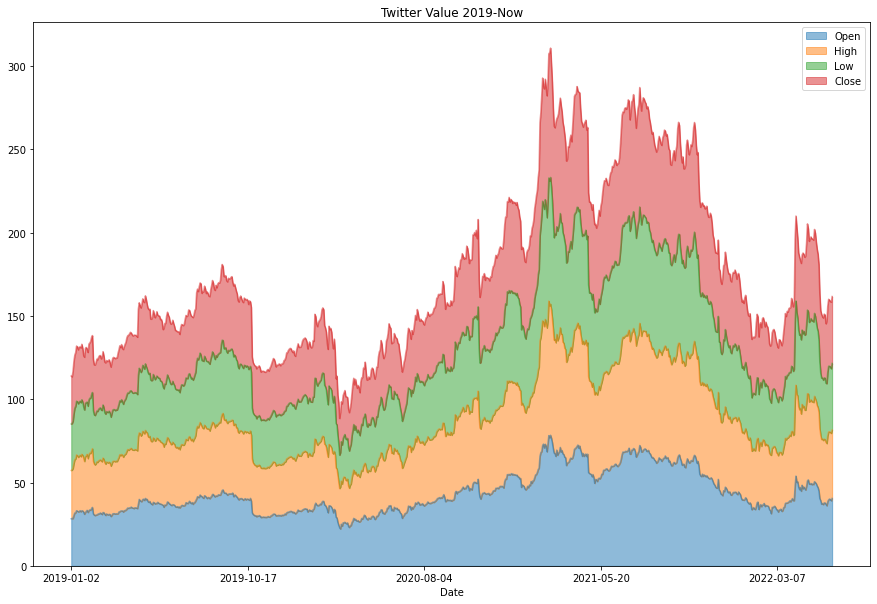

In [ ]:
df[["Open","High","Low","Close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('Twitter Value 2019-Now')
plt.show()

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 863 artists>

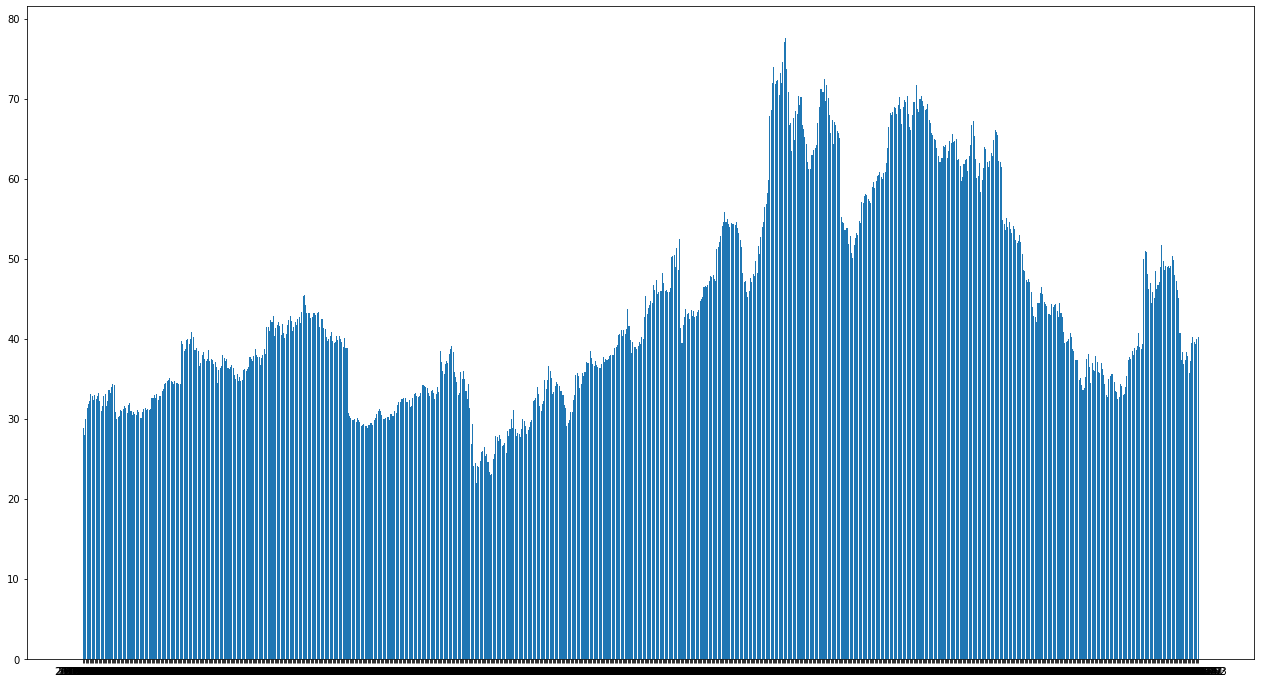

In [ ]:
plt.bar(x= df.index, height=df.Close)



# Prophet



In [ ]:
data_train=data.reset_index()
data = pd.DataFrame(pd.np.empty((0, 2)))  
data = df.filter(['Close'])

data_train.columns=['ds','y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


model=Prophet()
model.fit(data_train) ##Fitting our data

future=model.make_future_dataframe(periods=157)
predict=model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 46.5, 'Date')

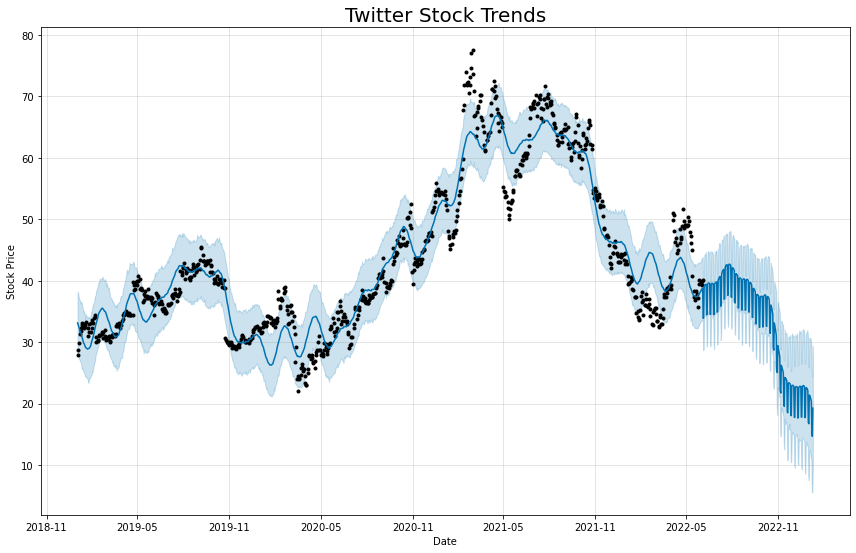

In [ ]:
fig1=model.plot(predict,figsize=(12,7.5))
plt.title('Twitter Stock Trends',fontsize=20)
plt.ylabel('Stock Price')
plt.xlabel('Date')

Text(0.5, 46.5, 'Year')

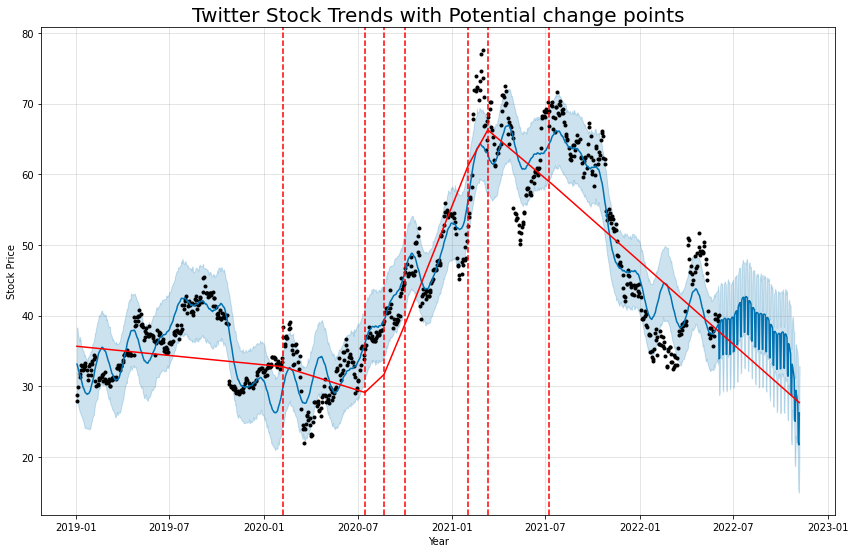

In [ ]:
fig = model.plot(predict,figsize=(12,7.5))
a = add_changepoints_to_plot(fig.gca(), model, predict)
plt.title('Twitter Stock Trends with Potential change points',fontsize=20)
plt.ylabel('Stock Price')
plt.xlabel('Year')

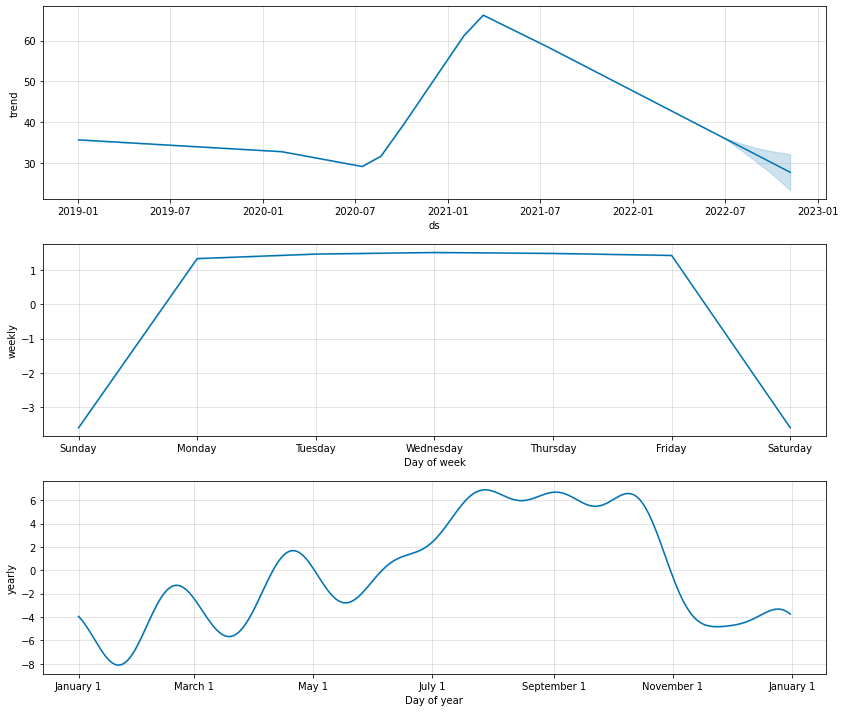

In [ ]:
fig2=model.plot_components(predict,figsize=(12,10))

# Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

lin2_data=df
x2=df.index.factorize()[0].reshape(-1, 1)

reg = LinearRegression(copy_X=True, fit_intercept=True)

reg_df= pd.read_csv('/content/TWTR (1).csv')
reg_df['Time'] = np.arange(len(reg_df.index))
X = reg_df.loc[:, ['Time']]  # features
y = reg_df.loc[:, 'Close']  # target
X_train = X[:810]
X_test = X[-53:]
y_train = y[:810]
y_test = y[-53:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

reg.fit(X_train, y_train)
print('Score %.2f' % reg.score(X, y))

Score 0.27


In [ ]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)

print("Mean square error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score %.2f' % r2_score(y_test, y_pred))

Mean square error: 232.03
Variance score -8.30


In [ ]:
from scipy.stats import linregress
linregress(y_test,y_pred)

LinregressResult(slope=-0.017012404809713572, intercept=58.7531022244977, rvalue=-0.167766235619802, pvalue=0.22984205356328835, stderr=0.013998344685696986)

In [ ]:
reg_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Date value': X_test.values.flatten(), 'Diference': y_test-y_pred})
reg_df.sort_values(by=['Date value'], inplace=True)
reg_df

,Actual,Predicted,Date value,Diference
810,37.439999,57.149441,810,-19.709442
811,38.430000,57.182554,811,-18.752554
812,38.000000,57.215666,812,-19.215666
813,38.820000,57.248778,813,-18.428778
814,38.599998,57.281891,814,-18.681893
815,39.119999,57.315003,815,-18.195004
816,40.689999,57.348115,816,-16.658116
817,39.000000,57.381228,817,-18.381228
818,38.689999,57.414340,818,-18.724341
819,39.310001,57.447453,819,-18.137452


In [ ]:
from sklearn.metrics import max_error

max_error(y_test, y_pred)

22.87950035753959

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print(MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.35168404632562
232.02654745194357
Mean Squared Error: 232.02654745194357
Root Mean Squared Error: 15.232417649603216


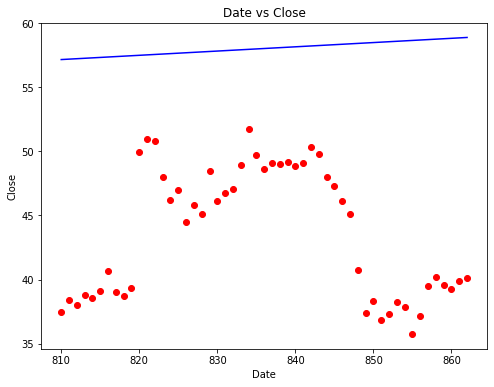

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Date vs Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

Text(0, 0.5, 'Amount of errors in sample')

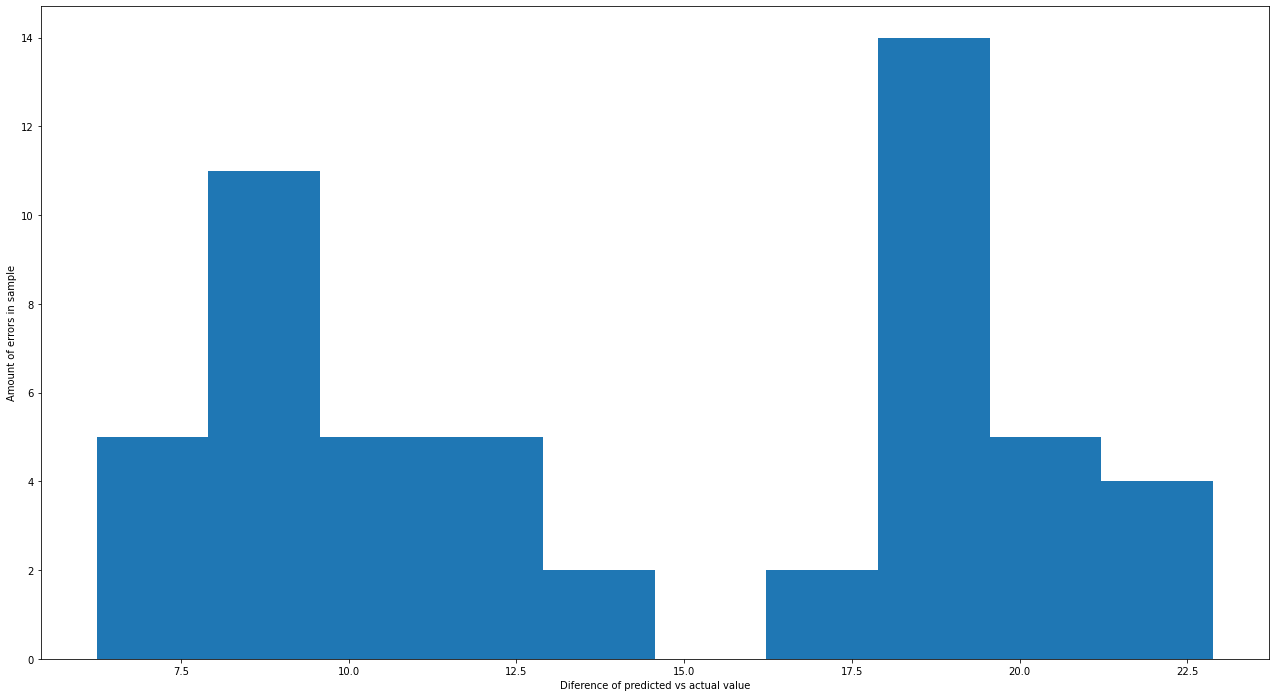

In [ ]:
residuals = y_pred - y_test
plt.hist(residuals)
plt.xlabel("Diference of predicted vs actual value")
plt.ylabel("Amount of errors in sample")

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

-8.29957870810475


# **LSTM**

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import time
import seaborn as sns

plt.rcParams['figure.figsize']=(22,12)

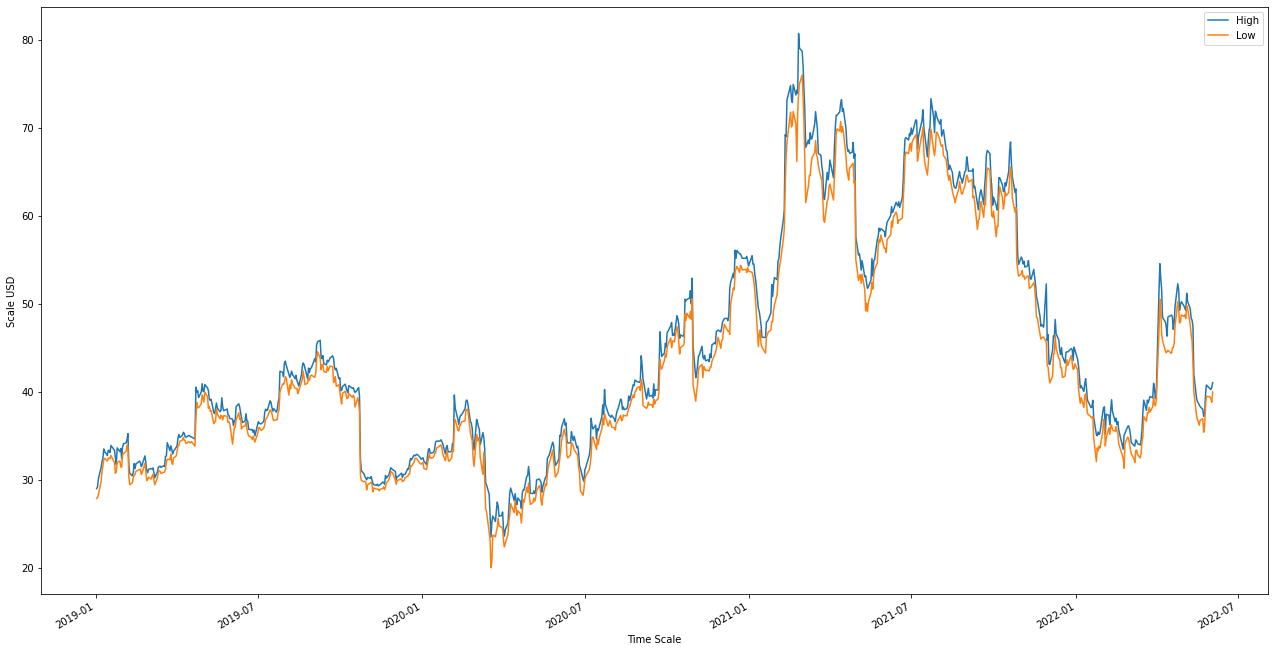

In [ ]:
x=[dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df.index.values]
plt.plot(x, df['High'], label='High')
plt.plot(x,df['Low'], label='Low')


plt.xlabel('Time Scale')
plt.ylabel('Scale USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [ ]:
#target_y = df['Close']

#X_feat = df.iloc[:,0:3]
#X_feat

#split_date = '2022-03-31' 
#df_train = df.loc[df.index <= split_date].copy()
#df_test = df.loc[df.index > split_date].copy()

data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

training_data_len

sc = StandardScaler()

#training_data=df_train.iloc[:,2:3].values
scaled_data = sc.fit_transform(dataset)


In [ ]:
#sc = StandardScaler()

#X_ft = sc.fit_transform(X_feat.values)
#X_ft= pd.DataFrame(columns=X_feat.columns, 
 #                  data=X_ft, 
  #                 index =X_feat.index)


In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
X_train2=[]
y_train2=[]
for i in range(53,len(train_data)):
    X_train2.append(train_data[i-53:i,0])
    y_train2.append(train_data[i,0])

X_train2= np.array(X_train2)
y_train2=np.array(y_train2)    

X_train2=X_train2.reshape((len(train_data)-53),53,1)

X_train2.shape

(638, 53, 1)

(1, 2, 0) (1, 2, 0) (0, 2, 0) (0,)


In [ ]:
lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, input_shape= (X_train2.shape[1], 1)))
lstm.add(LSTM(32, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

#Compiling RNN
lstm.compile(optimizer='adam',loss='mean_squared_error')
lstm.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 53, 64)            16896     
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 25)                825       
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 30,163
Trainable params: 30,163
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm.fit(X_train2,y_train2,epochs=100,batch_size=32)


Epoch 1/100
20/20 [==============================] - 5s 45ms/step - loss: 0.2501
Epoch 2/100
20/20 [==============================] - 1s 46ms/step - loss: 0.0879
Epoch 3/100
20/20 [==============================] - 1s 46ms/step - loss: 0.0703
Epoch 4/100
20/20 [==============================] - 1s 46ms/step - loss: 0.0565
Epoch 5/100
20/20 [==============================] - 1s 46ms/step - loss: 0.0473
Epoch 6/100
20/20 [==============================] - 1s 45ms/step - loss: 0.0415
Epoch 7/100
20/20 [==============================] - 1s 46ms/step - loss: 0.0388
Epoch 8/100
20/20 [==============================] - 1s 47ms/step - loss: 0.0359
Epoch 9/100
20/20 [==============================] - 1s 48ms/step - loss: 0.0320
Epoch 10/100
20/20 [==============================] - 1s 47ms/step - loss: 0.0310
Epoch 11/100
20/20 [==============================] - 1s 46ms/step - loss: 0.0298
Epoch 12/100
20/20 [==============================] - 1s 47ms/step - loss: 0.0286
Epoch 13/100
20/20 [=====

In [ ]:
#test prediction prior to Musk's bid to buy Twitter on April,4th

test_data = scaled_data[training_data_len - 53: , :]
# Create the data sets x_test and y_test
X_test2 = []
y_test2 = dataset[training_data_len:, :]
for i in range(53, len(test_data)):
    X_test2.append(test_data[i-53:i, 0])
    
# Convert the data to a numpy array
X_test2 = np.array(X_test2)

# Reshape the data
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1 ))

# Get the models predicted price values 
y_pred2 = lstm.predict(X_test2)
y_pred2  = sc.inverse_transform(y_pred2 )

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred2 - y_test2) ** 2)))
rmse

7.368653968113706

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I

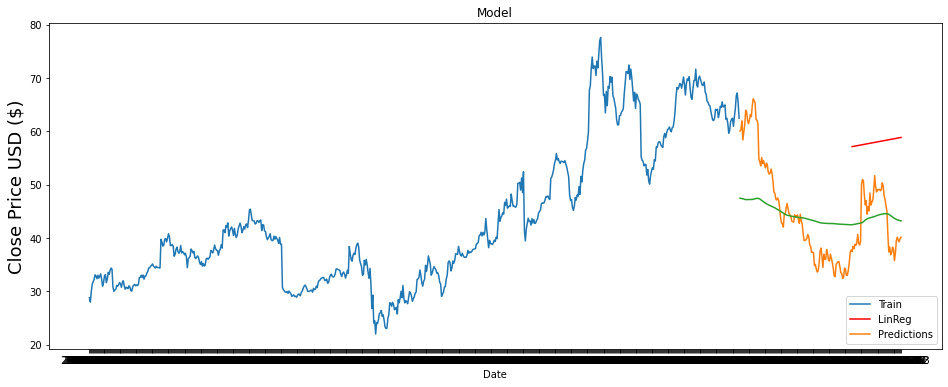

In [ ]:
from pandas.core.tools.datetimes import DatetimeScalar

train = data[:training_data_len]
valid = data[training_data_len:]
x=[dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df.index.values]

valid['Predictions'] = y_pred2
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(X_test, y_pred, color='red')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'LinReg', 'Predictions'], loc='lower right')

plt.show()

In [ ]:
print("Mean square error: %.2f" % mean_squared_error(y_test2, y_pred2))
print('Variance score %.2f' % r2_score(y_test2, y_pred2))

Mean square error: 2.74
Variance score 0.96


In [ ]:

reg.predict(np.array([[3000]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([114.69082707])

In [ ]:

df3 = pd.DataFrame({'Actual': y_test2 , 'Predicted (Linear)': y_pred2, 'Predicted (LSTM)': y_pred2.flatten(), 'Date value': df.index, 'Diference(Linear)':y_test-y_pred,'Diference(Polynomial)': y_test2-y_pred2.flatten()})
df3.sort_values(by=['Date value'], inplace=True)
df3

ValueError: ignored

In [ ]:
import plotly.express as px
df = df
fig = px.line(df, x=df.index, y=df.columns,
              hover_data={"Close": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()